# Installation

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0008.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0009.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0010.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0011.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0012.jpg
C:/Users/Admin/D

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.0.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.10.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.100.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1000.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1008.jpg
C:/Users/Admin/Downloads/Thesis Co

ModuleNotFoundError: No module named 'keras.layers.core'

# Train & Test Directories 

In [3]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [4]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in i:
        train_non_autistic.append(os.path.join(train_data, i))
    else:
        train_autistic.append(os.path.join(train_data, i))

test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in i:
        test_non_autistic.append(os.path.join(test_data, i))
    else:
        test_autistic.append(os.path.join(test_data, i))

In [5]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

In [6]:
test_imgs = test_autistic + test_non_autistic
random.shuffle(test_imgs)

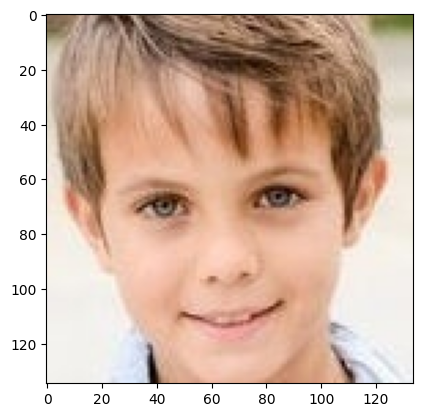

In [7]:
import matplotlib.image as mpimg
for ima in train_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

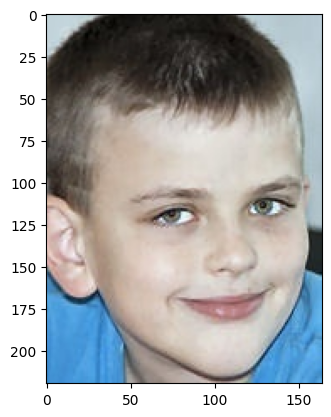

In [8]:
import matplotlib.image as mpimg
for ima in test_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [9]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image_path in list_of_images:
        # Read and resize the image
        img = cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (224, 224), interpolation=cv2.INTER_CUBIC)
        
        if 'Non_Autistic' in image_path:
            y.append(0)
        else:
            y.append(1)
            
    return X, y

X_train, y_train = read_and_process_image(train_imgs)
X_test, y_test = read_and_process_image(test_imgs)


# Validation Data

In [10]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [11]:
X_val, y_val = read_and_process_image(val_imgs)

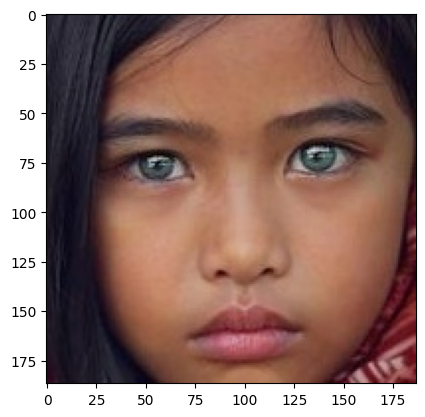

In [12]:
import matplotlib.image as mpimg
for ima in val_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Shape Of Data

In [13]:
# print("Shape of Train images:", X_train.shape)
# print("Shape of Train labels:", y_train.shape)
# print("Shape of validation images:", X_val.shape)
# print("Shape of validation labels:", y_val.shape)

# Preprocessing 

In [14]:
def preprocess_image(train_data, target_size=(224, 224)):
    # Read the image
    image = cv2.imread(train_data, cv2.IMREAD_COLOR)
    
    # Resize the image
    if target_size:
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
    # Normalize pixel values
    image = image / 255.0
    
    return image

X_train = [preprocess_image(train_data) for train_data in train_imgs]
X_test = [preprocess_image(test_data) for test_data in test_imgs]
X_val = [preprocess_image(val_data) for val_data in val_imgs]


# Converting Train & Val Data To np Array


In [15]:
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)


# Assuming y_train, y_val, and y_test are 1D arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# # Expand dimensions to create 4D arrays
# y_train_expanded = np.expand_dims(y_train, axis=0)
# y_val_expanded = np.expand_dims(y_val, axis=0)
# y_test_expanded = np.expand_dims(y_test, axis=0)


# Data Augmentation

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming X_train, X_val, and X_test are 4D arrays
# If they are 3D, you may need to add an extra dimension
# X_train = np.expand_dims(X_train, axis=0)
# X_val = np.expand_dims(X_val, axis=0)
# X_test = np.expand_dims(X_test, axis=0)

# Assuming y_train, y_val, and y_test are properly formatted labels

# Generating Larger DataSet - Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=4,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating ImageDataGenerator generators
batch_size = 32
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)
test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)


# Feature Extraction (vgg16,vgg19,mobilenet,xception,efficentnet)

In [40]:
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.feature_selection import SelectKBest

# Assuming you have X_train, X_val, y_train_encoded, and y_val_encoded from your previous code

# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data, input_size=(224, 224)):
    base_model = model(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = cv2.resize(img, (input_size[0], input_size[1]))  # Resize or crop to match the model's input size
        img = np.expand_dims(img, axis=0)
        features.append(model.predict(img))

    return np.vstack(features)

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_val_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train))
    X_val_features.append(extract_features(model, X_val))
    X_test_features.append(extract_features(model, X_test))
    

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_val_features = np.concatenate(X_val_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)

# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features)
X_val_features_std = scaler.transform(X_val_features)
X_test_features_std = scaler.transform(X_test_features)


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 396ms/step


1/1 [==============================] - 0s 203ms/step


1/1 [==============================] - 0s 239ms/step


1/1 [==============================] - 0s 250ms/step


1/1 [==============================] - 0s 203ms/step


1/1 [==============================] - 0s 234ms/step


1/1 [==============================] - 0s 203ms/step


1/1 [==============================] - 0s 266ms/step


1/1 [==============================] - 0s 234ms/step


1/1 [==============================] - 0s 219ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 235ms/step


1/1 [==============================] - 0s 230ms/step


1/1 [==============================] - 0s 190ms/step


1/1 [==============================] - 0s 201ms/step


1/1 [==============================] - 0s 200ms/step


1/1 [==============================] - 0s 200ms/step


1/1 [==============================] - 0s 185ms/step


1/1 [==============================] - 0s 230ms/step


1/1 [==============================] - 0s 220ms/step


1/1 [==============================] - 0s 205ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 70ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 71ms/step


# ANOVA Analysis

In [41]:
# Perform ANOVA analysis
k_best = SelectKBest(f_classif, k='all')

X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
X_test_selected = k_best.transform(X_test_features_std)
X_val_selected = k_best.transform(X_val_features_std)

# Print selected features
selected_features_indices = np.where(k_best.get_support())[0]
print("Selected Features Indices:", selected_features_indices)


Selected Features Indices: [   0    1    2 ... 5373 5374 5375]


# Adaboost

In [42]:
# !pip install xgboost


In [43]:
from sklearn.ensemble import AdaBoostClassifier
# import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you have X_train_features_std, X_val_features_std, y_train, y_val from previous code

# Create a logistic regression model (as the base learner)

# Create a logistic regression model (as the base learner)
base_classifier = LogisticRegression(random_state=42)

# Create an XGBoost classifier using logistic regression as the base learner
# xgb_classifier = xgb.XGBClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Create an AdaBoostClassifier using the logistic regression model as the base learner
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)


In [44]:
# Train the boosting model
adaboost_classifier.fit(X_train_selected, y_train)

AdaBoostClassifier(estimator=LogisticRegression(random_state=42),
                   random_state=42)

In [45]:
# Make predictions on the validation set
predictions = adaboost_classifier.predict(X_val_selected)

# Evaluate performance
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy*100)

Validation Accuracy: 80.0


In [46]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions on the validation set
predictions = adaboost_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, predictions)

# Calculate precision
precision = precision_score(y_test, predictions, average='micro')

# Calculate recall
recall = recall_score(y_test, predictions, average='micro')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

print("Test Accuracy:", accuracy * 100)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 89.0
Test Precision: 0.89
Test Recall: 0.89
Confusion Matrix:
[[135  15]
 [ 18 132]]


#GradCam

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import backend as K

# Function to generate GradCAM visualization
def generate_gradcam(model, img_array, layer_name):
    img_array = preprocess_input(img_array.copy())
    preds = model.predict(img_array)
    pred_class = np.argmax(preds[0])
    last_conv_layer = model.get_layer(layer_name)
    grad_model = Model(
        [model.inputs], [last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, pred_class]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heatmap = np.max(heatmap)
    if max_heatmap == 0:
        max_heatmap = 1e-10
    heatmap /= max_heatmap

    heatmap = heatmap.reshape((heatmap.shape[0], heatmap.shape[1]))

    return heatmap

# Select an image for visualization
img_path = 'path_to_your_image.jpg'  # Replace with the path to the image you want to visualize
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))

# Visualize GradCAM
heatmap = generate_gradcam(adaboost_classifier, np.expand_dims(img, axis=0), 'block5_conv3')
plt.imshow(img)
plt.imshow(heatmap, alpha=0.5)
plt.show()

# Memory Release

In [25]:
import gc

In [26]:
del X_train_features, X_val_features, X_train, X_val
gc.collect()  

65112

# Training And Val Loss

In [42]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
# sns.set_style("whitegrid")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training and Validation Loss")

## Classification Report

In [45]:
# cl_report = classification_report(y_test, predictions)
# print(cl_report)

## Confusion Matrix 

In [46]:
# cn_matrix= confusion_matrix(y_test, predictions)
# cn_matrix

## Plotting the True Positives, True Negatives, False Positives and False Negatives 

In [47]:
# # Plotting the True Positives, True Negatives, False Positives and False Negatives from model's predictions
# f, ax = plt.subplots(figsize = (8,6))
# ax = sns.heatmap(cn_matrix, annot=True)
# ax.set_xlabel("Predicted")
# ax.set_ylabel("True")
# ax.set_title("Confusion Matrix")